In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Chargement des données
df = pd.read_csv("donnees-synop-essentielles-omm.csv", sep=";")

# Prétraitement des données
# On drop toutes les données qui ne sont pas numériques (sauf la date),
# Celles qui sont particulièrement vide (>1/3 manquants),
# Et celles qui ont toujours la même valeur (ex. Coordonnees)
to_drop = ["ID OMM station"
           ,"Temps passé 1"
           ,"Temps passé 1.1"
           ,"Temps passé 2"
           ,"Temps présent.1"
           ,"Niveau barométrique"
           ,"Géopotentiel"
           ,"Température minimale sur 12 heures"
           ,"Température minimale sur 24 heures"
           ,"Température maximale sur 12 heures"
           ,"Température maximale sur 24 heures"
           ,"Température du thermomètre mouillé"
           ,"Méthode de mesure Température du thermomètre mouillé"
           ,"Température minimale sur 12 heures (°C)"
           ,"Température minimale sur 24 heures (°C)"
           ,"Température maximale sur 12 heures (°C)"
           ,"Température maximale sur 24 heures (°C)"
           ,"Coordonnees"
           ,"Nom"
           ,"Type de tendance barométrique.1"
           ,"Latitude"
           ,"Longitude"
           ,"Altitude"
           ,"communes (name)"
           ,"communes (code)"
           ,"EPCI (name)"
           ,"EPCI (code)"
           ,"department (name)"
           ,"department (code)"
           ,"region (name)"
           ,"region (code)"
           ,"Précipitations dans les 6 dernières heures"
           ,"Précipitations dans les 12 dernières heures"
           ,"Précipitations dans les 24 dernières heures"
           ,"Type des nuages de l'étage inférieur"
           ,"Type des nuages de l'étage moyen"
           ,"Type des nuages de l'étage supérieur"
           ,"Periode de mesure de la neige fraiche"
           ,"Phénomène spécial 1"
           ,"Phénomène spécial 2"
           ,"Phénomène spécial 3"
           ,"Phénomène spécial 4"
           ,"Type nuage 1"
           ,"Nébulosité couche nuageuse 2"
           ,"Type nuage 2"
           ,"Hauteur de base 2"
           ,"Nébulosité couche nuageuse 3"
           ,"Type nuage 3"
           ,"Hauteur de base 3"
           ,"Nébulosité couche nuageuse 4"
           ,"Type nuage 4"
           ,"Hauteur de base 4"]

df.drop(to_drop, axis=1, inplace=True)
df["Date"] = df["Date"].map(lambda x: datetime.fromisoformat(x))

df.sort_values(by="Date", ascending=True, inplace=True, ignore_index=True)

# On prend les dernières données quand on en n'a pas de nouvelles
df.fillna(method='bfill', inplace=True)

#Some first values are missing, so we take the next known data instead
df.fillna(method='ffill', inplace=True)

print(df.info())

<ipython-input-131-ae99504651dc>:2: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("donnees-synop-essentielles-omm.csv", sep=";")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38919 entries, 0 to 38918
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Date                                                       38919 non-null  object 
 1   Pression au niveau mer                                     38919 non-null  float64
 2   Variation de pression en 3 heures                          38919 non-null  float64
 3   Type de tendance barométrique                              38919 non-null  float64
 4   Direction du vent moyen 10 mn                              38919 non-null  float64
 5   Vitesse du vent moyen 10 mn                                38919 non-null  float64
 6   Température                                                38919 non-null  float64
 7   Point de rosée                                             38919 non-null  float64
 8   Humidi

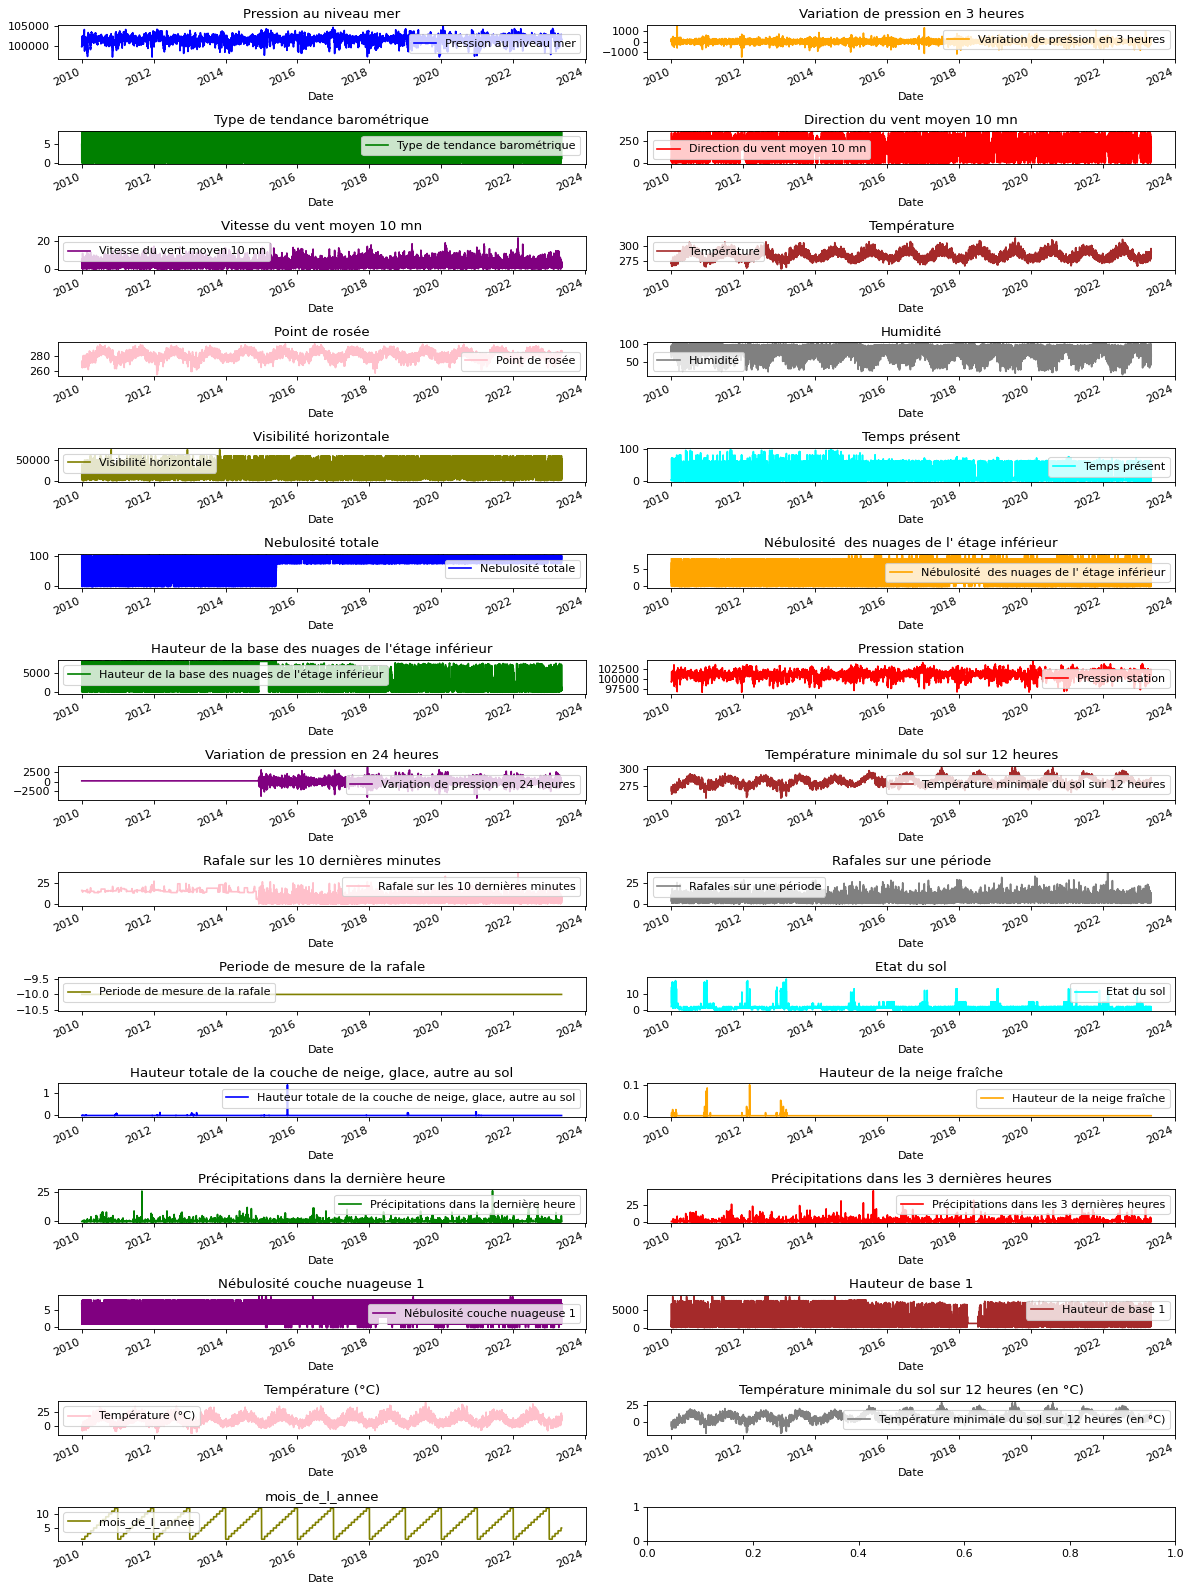

In [ ]:
titles = [
    "Pression au niveau mer",
    "Variation de pression en 3 heures",
    "Type de tendance barométrique",
    "Direction du vent moyen 10 mn",
    "Vitesse du vent moyen 10 mn",
    "Température",
    "Point de rosée",
    "Humidité",
    "Visibilité horizontale",
    "Temps présent",
    "Nebulosité totale",
    "Nébulosité  des nuages de l' étage inférieur",
    "Hauteur de la base des nuages de l'étage inférieur",
    "Pression station",
    "Variation de pression en 24 heures",
    "Température minimale du sol sur 12 heures",
    "Rafale sur les 10 dernières minutes",
    "Rafales sur une période",
    "Periode de mesure de la rafale",
    "Etat du sol",
    "Hauteur totale de la couche de neige, glace, autre au sol",
    "Hauteur de la neige fraîche",
    "Précipitations dans la dernière heure",
    "Précipitations dans les 3 dernières heures",
    "Nébulosité couche nuageuse 1",
    "Hauteur de base 1",
    "Température (°C)",
    "Température minimale du sol sur 12 heures (en °C)",
    "mois_de_l_annee"
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=15, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(titles)):
        key = titles[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title= titles[i],
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)

<ipython-input-133-88ba59affafb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(data.corr())


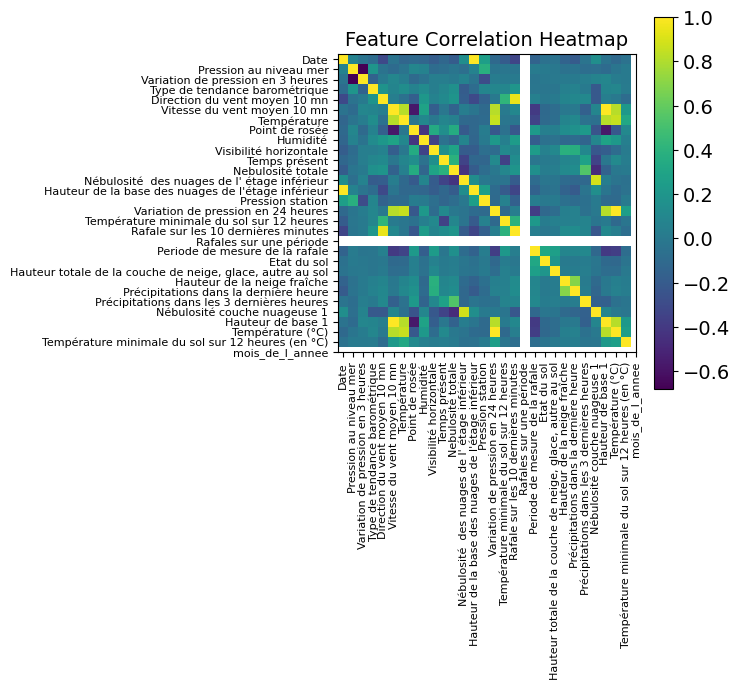

In [ ]:

def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=8, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=8)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df)


## Data Preprocessing

Here we are picking ~39,000 data points for training. Observation is recorded every
3 mins, that means 20 times per hour. We will resample one point per hour since no
drastic change is expected within 60 minutes. We do this via the `sampling_rate`
argument in `timeseries_dataset_from_array` utility.

We are tracking data from past 2400 timestamps (2400/20=120 hours). This data will be
used to predict the temperature after 240 timestamps (240/20=12 hours).

Since every feature has values with
varying ranges, we do normalization to confine feature values to a range of `[0, 1]` before
training a neural network.
We do this by subtracting the mean and dividing by the standard deviation of each feature.

80 % of the data will be used to train the model. `split_fraction` can
be changed to alter this percentage.

The model is shown data for first 5 days i.e. 2400 observations, that are sampled every
hour. The temperature after 240 (12 hours * 20 observations per hour) observations will be
used as a label.

In [ ]:
split_fraction = 0.8
train_split = int(split_fraction * int(df.shape[0]))
step = 20

past = 2400
future = 240
learning_rate = 0.001
batch_size = 256
epochs = 15


def normalize(data, train_split):
    print(data)
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return ((data - data_mean) / data_std), data_mean[15], data_std[15]


def denormalize(data, origin_mean, origin_std):
    return data * origin_std + origin_mean

## Feature selection
From the data exploration and the heatmap, we notice some of the features that passed the data cleaning stage are either inconsistent or redundant. We therefore apply a second round of selection to remove them.

The selected parameters are: Pression au niveau mer, Variation de pression en 3 heures, Type de tendance barométrique, Direction du vent moyen 10 mn, Humidité, Visibilité horizontale, Temps présent, Nébulosité  des nuages de l' étage inférieur, Hauteur de la base des nuages de l'étage inférieur, Rafales sur une période, Etat du sol, Hauteur totale de la couche de neige, glace, autre au sol, Hauteur de la neige fraîche, Précipitations dans la dernière heure, Nébulosité couche nuageuse 1, Température (°C), mois_de_l_annee


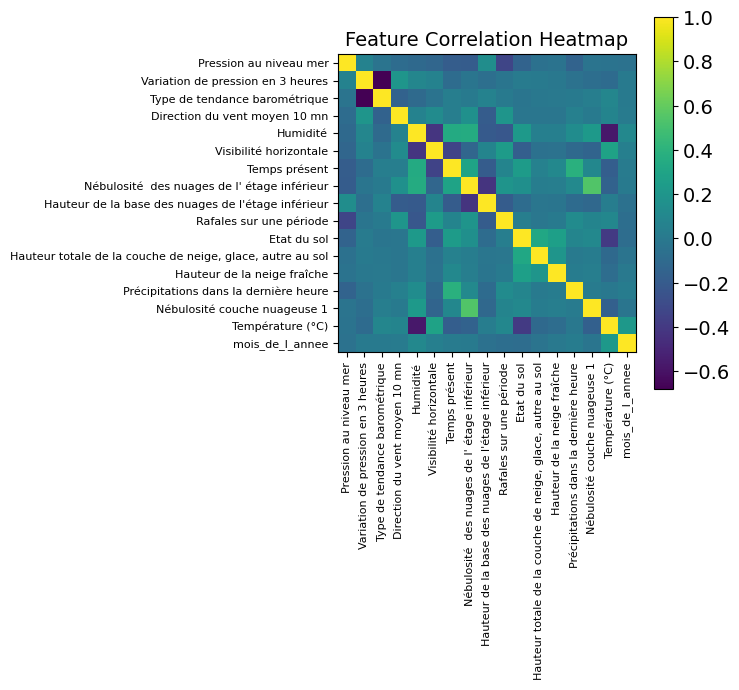

In [ ]:
selected_features = [
    "Pression au niveau mer",
    "Variation de pression en 3 heures",
    "Type de tendance barométrique",
    "Direction du vent moyen 10 mn",
    "Humidité",
    "Visibilité horizontale",
    "Temps présent",
    "Nébulosité  des nuages de l' étage inférieur",
    "Hauteur de la base des nuages de l'étage inférieur",
    "Rafales sur une période",
    "Etat du sol",
    "Hauteur totale de la couche de neige, glace, autre au sol",
    "Hauteur de la neige fraîche",
    "Précipitations dans la dernière heure",
    "Nébulosité couche nuageuse 1",
    "Température (°C)",
    "mois_de_l_annee"
]

print(
    "The selected parameters are:",
    ", ".join(selected_features),
)
features = df[selected_features]
show_heatmap(features)
features.index = df[date_time_key]

In [ ]:
features, y_mean, y_std = normalize(features.values, train_split)
features = pd.DataFrame(features)

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

[[ 9.9700e+04  2.0000e+01  1.0000e+00 ...  7.0000e+00  2.0000e-01
   1.0000e+00]
 [ 9.9690e+04 -1.0000e+01  5.0000e+00 ...  7.0000e+00  1.0000e-01
   1.0000e+00]
 [ 9.9760e+04  7.0000e+01  3.0000e+00 ...  7.0000e+00  2.0000e-01
   1.0000e+00]
 ...
 [ 1.0159e+05 -7.0000e+01  6.0000e+00 ...  5.0000e+00  1.9000e+01
   5.0000e+00]
 [ 1.0158e+05 -2.0000e+01  8.0000e+00 ...  7.0000e+00  1.8000e+01
   5.0000e+00]
 [ 1.0154e+05 -4.0000e+01  8.0000e+00 ...  4.0000e+00  1.7600e+01
   5.0000e+00]]


In [ ]:
# scaler = MinMaxScaler()
# y_feature = "Température (°C)"
# X = features.drop(y_feature, axis=1)
# X = scaler.fit_transform(X)
# y = features[y_feature]
# y = scaler.fit_transform(y.to_numpy().reshape(-1, 1))
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split_fraction, shuffle=False)

In [ ]:
start = past + future
end = start + train_split
print(train_data)

y_train = features.iloc[start:end][[15]]
x_train = train_data[[i for i in range(17) if i != 15]].values


sequence_length = int(past / step)

             0         1         2         3         4         5         6   \
0     -1.984270  0.153883 -1.229602 -1.495821  0.439424 -0.840569 -0.351344   
1     -1.994663 -0.077782  0.256175 -1.598707  0.321665 -0.656954 -0.462975   
2     -1.921911  0.539991 -0.486713 -1.598707  0.086147 -0.656954 -0.407160   
3     -1.734834  1.389429 -0.486713 -1.598707 -0.031612 -0.167312 -0.351344   
4     -1.537365  1.466651 -1.229602 -1.495821 -0.620406  1.056793 -0.351344   
...         ...       ...       ...       ...       ...       ...       ...   
31130  0.291827  0.231104 -1.229602  0.664781 -0.208250  0.828497 -0.462975   
31131  0.354186  0.462769 -0.486713  0.561895  0.262785 -0.288498 -0.462975   
31132  0.447724  0.694434 -1.229602  0.356123  0.674941  0.855427 -0.462975   
31133  0.478904  0.231104 -1.229602  0.561895  0.439424  2.280897 -0.462975   
31134  0.458118 -0.232225  0.627620  0.664781  0.557182 -0.768959  2.774320   

             7         8         9         10      

In [ ]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [ ]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(17) if i != 15]].values
y_val = features.iloc[label_start:][[15]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 16)
Target shape: (256, 1)


In [ ]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32, activation='softmax')(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 120, 16)]         0         
                                                                 
 lstm_11 (LSTM)              (None, 32)                6272      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,305
Trainable params: 6,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/15
113/113 [==============================] - ETA: 0s - loss: 0.9853
Epoch 1: val_loss improved from inf to 0.79792, saving model to model_checkpoint.h5
113/113 [==============================] - 19s 152ms/step - loss: 0.9853 - val_loss: 0.7979
Epoch 2/15
112/113 [============================>.] - ETA: 0s - loss: 0.9779
Epoch 2: val_loss improved from 0.79792 to 0.79065, saving model to model_checkpoint.h5
113/113 [==============================] - 16s 144ms/step - loss: 0.9762 - val_loss: 0.7907
Epoch 3/15
112/113 [============================>.] - ETA: 0s - loss: 0.9684
Epoch 3: val_loss improved from 0.79065 to 0.78189, saving model to model_checkpoint.h5
113/113 [==============================] - 17s 149ms/step - loss: 0.9667 - val_loss: 0.7819
Epoch 4/15
112/113 [============================>.] - ETA: 0s - loss: 0.9541
Epoch 4: val_loss improved from 0.78189 to 0.76518, saving model to model_checkpoint.h5
113/113 [==============================] - 16s 142ms/step - loss: 0.

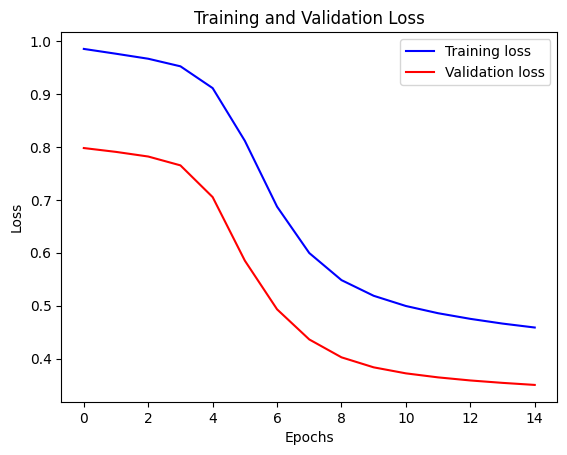

In [ ]:

def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

8/8 [==============================] - 0s 13ms/step


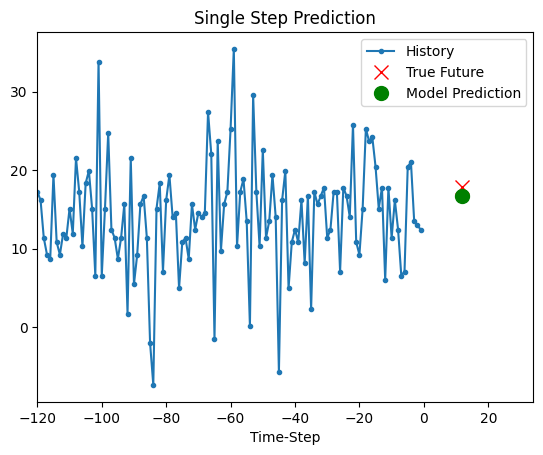

8/8 [==============================] - 0s 13ms/step


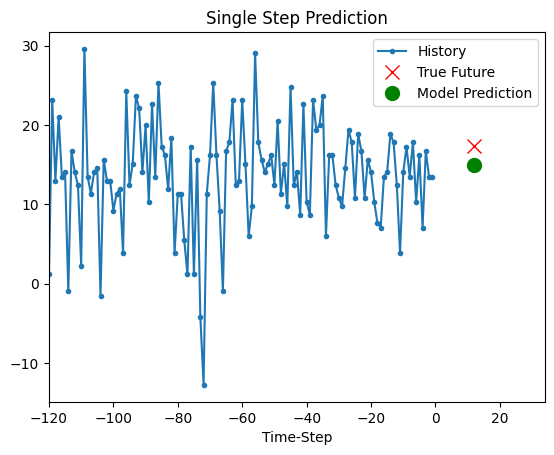

8/8 [==============================] - 0s 13ms/step


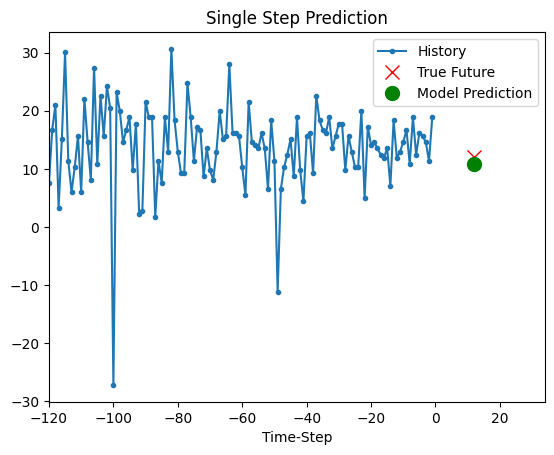

8/8 [==============================] - 0s 13ms/step


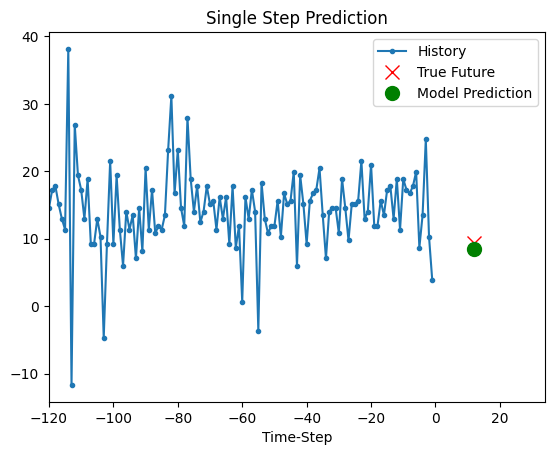

8/8 [==============================] - 0s 13ms/step


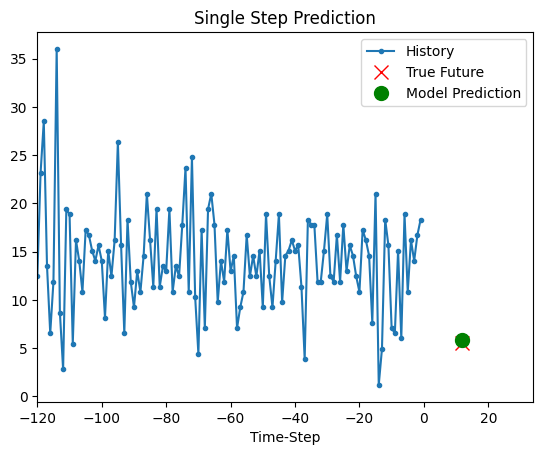

In [ ]:

def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    pred = model.predict(x)[0]
    pred = denormalize(pred, y_mean, y_std)
    x = denormalize(x, y_mean, y_std)
    y = denormalize(y, y_mean, y_std)
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), pred],
        12,
        "Single Step Prediction",
    )
